# Image Recognition Challenge.

Import Required Libraries/Packages

In [1]:
import PIL
from PIL import Image
import cv2, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

Reading the image file in to Python

In [2]:
im = Image.open("D:\\test_samples\\1.jpg")

In [3]:
print type(im)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [4]:
im = np.asarray(im)

In [5]:
print type(im)
im.shape

<type 'numpy.ndarray'>


(374L, 500L, 3L)

Plot the Image using matplotlib

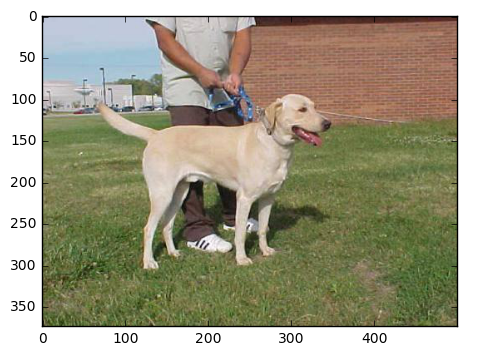

In [6]:
plt.imshow(im)

Image Augmentation:
Augment the image to resize, shift(horizontal and vertical), rotate and flip

In [7]:
resize_shape = 150
hshift = 0.2
vshift = 0.2
rotate = 40
flip = 0.4

In [8]:
def augmentation(image, size = 0, rotate = 0, hshift = 0, vshift =0, flip =0):
    img = image.resize((size, size), PIL.Image.NEAREST)
    img = PIL.ImageChops.offset(image = img, xoffset=(np.random.uniform(0,hshift ,1)), yoffset=(np.random.uniform(0,vshift,1)))
    r = np.random.choice(np.arange(rotate),1)
    img = img.rotate(r)
    f= np.random.uniform(0,1,1)
    if f<flip:
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
    return img
def resize(image,size=0):
    img = image.resize((size,size),PIL.Image.NEAREST)
    return img

Example:

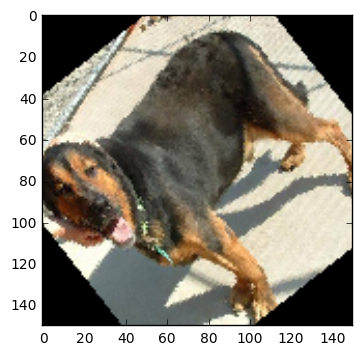

In [10]:
p = np.random.uniform(0,1,1)
im = Image.open("D:\\test_samples\\116.jpg")
if p<0.4:
    im = augmentation(im, size = resize_shape, rotate = rotate, hshift = hshift, vshift = vshift, flip = flip)
im = np.asarray(im)
plt.imshow(im)

In [11]:
print im.shape

(150L, 150L, 3L)


How to identify the class?

In [12]:
tags = ['cat0.jpg', 'cat7.jpg','dog3.jpg']

In [13]:
cls = [0 if i[:3]=='cat' else 1 for i in tags]

In [14]:
print cls

[0, 0, 1]


Read files names of images in the train folder.

In [15]:
path = 'D:\\train_samples'

In [16]:
for root, dirs, files in os.walk(path):
    train_ids = files

In [17]:
print train_ids[2000:2010]

['dog0.jpg', 'dog1.jpg', 'dog10.jpg', 'dog100.jpg', 'dog1000.jpg', 'dog1001.jpg', 'dog1002.jpg', 'dog1003.jpg', 'dog1004.jpg', 'dog1005.jpg']


In [18]:
len(train_ids)

4000

Shuffle to randomize learning

In [19]:
from random import shuffle
shuffle(train_ids)

Images from train data transformed to 150x150 and few of them augmented as well

In [20]:
print train_ids[2000:2010]

['cat1746.jpg', 'cat1461.jpg', 'dog263.jpg', 'dog1126.jpg', 'dog1208.jpg', 'cat1560.jpg', 'cat34.jpg', 'dog1629.jpg', 'dog845.jpg', 'dog1859.jpg']


In [21]:
train_list =[]
train_labels = []
for i in train_ids:
    im1 = Image.open("D:\\train_samples\\"+i)
    if i[:3].lower() == "cat":
        b = 0
    else:
        b = 1
    im1 = resize(im1,size=resize_shape)
    p = np.random.uniform(0,1,1)
    if p<0.4:    
        im1 = augmentation(im1,size=resize_shape,rotate=rotate,hshift=hshift,vshift=vshift,flip=flip)
    im1 = np.array(im1)
    train_list.append(im1)
    train_labels.append(b)

In [22]:
from __future__ import division

In [23]:
train_images = np.array(train_list)
train_images1 = 255-train_images
train_images1=train_images1/255

In [24]:
train_labels = np.array(train_labels)

In [27]:
train_labels[0:5]

array([0, 1, 1, 1, 1])

In [28]:
import numpy
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using Theano backend.


In [29]:
from keras.utils.np_utils import to_categorical

In [30]:
train_labels1 = to_categorical(train_labels)

In [32]:
print train_labels1[0:5]

[[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


Model Building

In [33]:
model = Sequential()

model.add(Conv2D(32, 5, 5, activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, 3, 3, activation='relu'))

model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(loss = "binary_crossentropy",
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Training the model

In [35]:
import time
start_time = time.time()

model.fit(train_images1, train_labels, nb_epoch=30, batch_size=32, show_accuracy=True, verbose=2)
          
print("--- %s seconds ---" % (time.time() - start_time))

d:\softwares\for_keras\keras-master\keras\models.py:654: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Epoch 1/30
211s - loss: 0.7009 - acc: 0.5230
Epoch 2/30
209s - loss: 0.6938 - acc: 0.5490
Epoch 3/30
221s - loss: 0.6798 - acc: 0.5782
Epoch 4/30
224s - loss: 0.6626 - acc: 0.6160
Epoch 5/30
226s - loss: 0.6122 - acc: 0.6730
Epoch 6/30
241s - loss: 0.5785 - acc: 0.7080
Epoch 7/30
239s - loss: 0.5198 - acc: 0.7480
Epoch 8/30
246s - loss: 0.4550 - acc: 0.7857
Epoch 9/30
232s - loss: 0.3764 - acc: 0.8345
Epoch 10/30
229s - loss: 0.2984 - acc: 0.8710
Epoch 11/30
3431s - loss: 0.2184 - acc: 0.9140
Epoch 12/30
229s - loss: 0.1670 - acc: 0.9347
Epoch 13/30
228s - loss: 0.1421 - acc: 0.9480
Epoch 14/30
233s - loss: 0.1062 - acc: 0.9627
Epoch 15/30
231s - loss: 0.0970 - acc: 0.9698
Epoch 16/30
245s - loss: 0.0829 - acc: 0.9723
Epoch 17/30
235s - loss: 0.0951 - acc: 0.9742
Epoch 18/30
235s - loss: 0.0757 - acc: 0.9775
Epoch 19/30
239s - loss: 0.0829 - acc: 0.9785
Epoch 20/30
237s - loss: 0.0948 - acc: 0.9762
Epoch 21/30
238s - loss: 0.0851 - acc: 0.9810
Epoch 22/30
240s - loss: 0.0885 - acc: 0.9

Predictions on Test data:

In [39]:
test_path = 'D:\\test_samples\\'

In [40]:
for root, dirs, files in os.walk(test_path):
    test_ids = files

In [41]:
print len(test_ids)

1000


In [42]:
Test_list =[]
for i in test_ids:
    im = Image.open("D:\\test_samples\\"+i)
    im = resize(im,size=resize_shape)
    im = np.array(im)
    Test_list.append(im)

In [43]:
test_images = np.array(Test_list)
test_images1 = 255-test_images
test_images1 = test_images1/255

In [44]:
predictions = model.predict(test_images1)

In [46]:
predictions[0:5]

array([[  7.59423567e-15],
       [  1.00000000e+00],
       [  1.37325304e-04],
       [  3.98832745e-10],
       [  3.42013664e-05]], dtype=float32)

In [53]:
type(predictions)

numpy.ndarray

In [74]:
probability = []
for x in predictions:
    g = '{0:.2f}'.format(float(x))
    probability.append(g)

In [75]:
type(probability)

list

Write test predictions to a csv file

In [58]:
import pandas as pd

In [71]:
Id = list(range(1000)) 

In [76]:
submit = pd.DataFrame(data={"Id": Id, "Probability": probability})

In [77]:
type(submit)
submit.head(5)

,Id,Probability
0,0,0.00
1,1,1.00
2,2,0.00
3,3,0.00
4,4,0.00


In [79]:
submit.to_csv("submission_Bharath.csv", sep=',', encoding='utf-8',index=False)